node degree clustering
0 4 0.3333333333333333
1 5 0.3
2 4 0.16666666666666666
3 4 0.5
4 4 0.16666666666666666
5 2 0
6 2 0
7 5 0.3
8 5 0.2
9 5 0.3

the adjacency list
0 8 2 9 1
1 2 4 9 3
2 7 6
3 9 8 7
4 7 6 8
5 8 9
6
7 9 8
8
9


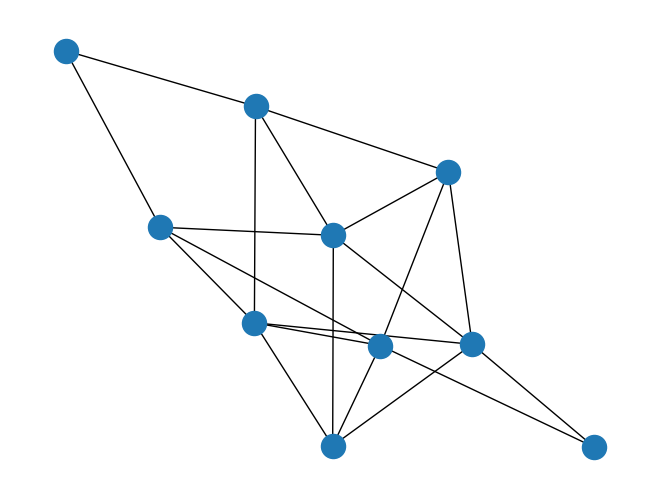

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

n = 10  # 50 nodes
m = 20  # 100 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()

## Testing Inner-GA

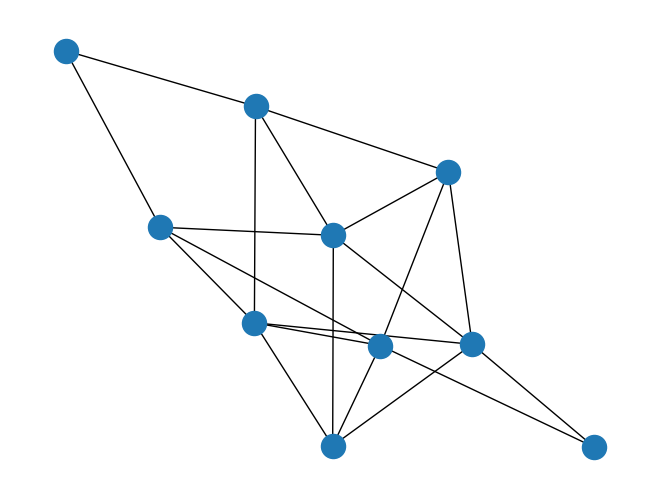

In [2]:
n = 10  # 50 nodes
m = 20  # 100 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()

In [3]:
import numpy as np
from numpy.random import randint, uniform

links = [x for x in G.edges()]
capacity =  np.array([randint(100, 350) for _ in range(len(links))])
flow = np.array([uniform(1, x*0.95) for x in capacity])

In [4]:
def generate_population(size: int, capacity: list):
    population = []
    for _ in range(size):
        population.append([uniform(1, x*0.95) for x in capacity])
    return np.array(population)

In [5]:
population = generate_population(20, capacity)

In [6]:
population

array([[102.56514972, 104.8567559 , 134.18485029,   5.05957456,
        151.04515313,  12.3002787 , 135.21140301, 183.36946241,
         53.60789894,  71.12921333, 117.7785272 ,  58.95132011,
        301.34885278, 134.67707986,  28.81410055, 109.10850511,
        152.62348369, 305.37863743,   7.32407806, 123.42647253],
       [151.55728197, 216.22739628,  61.15777083,  79.95096841,
         60.60604544, 313.6092669 , 111.38558461,  55.46316053,
         98.89396976, 151.3037349 , 123.49279247, 161.30456475,
        152.02885704, 227.08032879, 175.96609605,  49.89788369,
         83.13869428, 110.87963018,  39.40036263,  61.772378  ],
       [ 83.78846466,  48.71164654,  18.90808358,  44.77313225,
         67.23896445, 310.27965765,  69.98744696,  96.41192888,
         92.50971885,  96.27177573, 122.90647943, 226.99815537,
        229.89682353, 153.20750357, 232.00693264, 135.61038213,
        108.45169301, 199.92160651, 173.95690842,  20.35399426],
       [125.81023273, 133.90631501, 1

In [9]:
from numpy.random import random, randint, choice
def scatter_crossover(parent1: np.array, parent2: np.array, alpha: int, indpb = 0.8):
    if random() > indpb:
        return False
        
    c1 = np.copy(parent1)
    c2 = np.copy(parent2)
    
    n_genes = len(parent1)
    scatter_point = np.random.choice(n_genes, size=int(alpha * n_genes), replace=False)
    
    for i in scatter_point:
        c1[i] = parent2[i]
        c2[i] = parent1[i]
    
    return c1, c2

In [10]:
scatter_crossover(population[0], population[1], 0.5)

(array([102.56514972, 104.8567559 , 134.18485029,   5.05957456,
        151.04515313, 313.6092669 , 111.38558461,  55.46316053,
         53.60789894, 151.3037349 , 117.7785272 ,  58.95132011,
        152.02885704, 227.08032879, 175.96609605,  49.89788369,
         83.13869428, 305.37863743,  39.40036263, 123.42647253]),
 array([151.55728197, 216.22739628,  61.15777083,  79.95096841,
         60.60604544,  12.3002787 , 135.21140301, 183.36946241,
         98.89396976,  71.12921333, 123.49279247, 161.30456475,
        301.34885278, 134.67707986,  28.81410055, 109.10850511,
        152.62348369, 110.87963018,   7.32407806,  61.772378  ]))

In [199]:
def fitness_inga(capacity: np.array, flow: np.array):
    
    if (flow > (capacity * 0.95)).any():
        return 0
    
    sigma = flow.sum()
    temp = (flow/(capacity-flow)).sum()
    T = temp/sigma
    return 1/T

def gautil(flow: np.array, capacity: np.array):
    return flow/capacity

In [192]:
fitness_inga(capacity, population[7])

38.56840987114858

In [193]:
# gautil(population[0], capacity)

In [195]:
def tournament_selection(size: int, pop: np.array, fitness: np.array, k=5):

    index = []
    population = list(pop)
    select = []
    for _ in range(size):
        selection_ix = randint(len(population))
        for ix in np.random.randint(0, len(population), k-1):
            if fitness[ix] > fitness[selection_ix]:
                selection_ix = ix
        select.append(population.pop(selection_ix))
        index.append(selection_ix)

    return np.array(select), np.array(index)

In [197]:
from deap.tools import mutGaussian

def innerga(size=10, generasi=100, capacity=None, alpha=0.5, pMu=0.2, pCr=0.8):
    pop = generate_population(size, capacity)
    
    for gen in range(generasi):
        fitness = np.array([fitness_inga(capacity=capacity, flow=ind) for ind in pop])
        
        selected, _ = tournament_selection(size=size,pop=pop, fitness=fitness)
        
        sh = selected[0].shape[0]
        offspring = np.empty((0, sh))
        
        for p1, p2 in zip(selected[::2], selected[1::2]):
            if cross := scatter_crossover(alpha=alpha, parent1=p1, parent2=p2, indpb=pCr):
                c1, c2 = cross
                offspring = np.append(offspring, c1.reshape(1, sh), axis=0)
                offspring = np.append(offspring, c2.reshape(1, sh), axis=0)
            else:
                offspring = np.append(offspring, p1.reshape(1, sh), axis=0)
                offspring = np.append(offspring, p2.reshape(1, sh), axis=0)
            
        for m in offspring:
            mut = mutGaussian(m, 0, 1, pMu)[0]
            offspring = np.append(offspring, mut.reshape(1, sh), axis=0)
        
        pop = offspring

    return pop, np.array([fitness_inga(capacity=capacity, flow=ind) for ind in pop])
    

In [198]:
a, b = innerga(size=300, generasi=500, capacity=capacity)

## Outer GA

In [244]:
from functools import partial

def filter_edge(capacity, g):
    graph = nx.to_networkx_graph(g).edges()
    def filter_func(pair, graph):
        ed = set(graph)
        k, _ = pair
        if k in ed:
            return True
        else:
            return False
    filter_f = partial(filter_func, graph=graph)
    return dict(filter(filter_f, capacity.items()))

def generate_graph(size=10, nodes=10, edges=20, capacity=None):
    
    if capacity is None:
        capacity = {}
        G = nx.complete_graph(nodes) 
        for edge in G.edges:
            capacity[edge] =  randint(60, 300)
    graph = []    
    while len(graph) < size:
        temp_g = nx.gnm_random_graph(n=nodes, m=edges)
        if nx.is_connected(temp_g):
            graph.append(nx.to_numpy_array(temp_g))
    graph = np.array(graph)
            
    graph_cap = np.array([list(filter_edge(capacity, G).values()) for G in graph])
    return graph, graph_cap, capacity

In [243]:
g, gc, c = generate_graph()

In [20]:

from numpy.random import choice, randint, random

def clone_ind(size, pCl):
    idx = choice(a=size, size = int(np.ceil(pCl*size)), replace=False)
    return idx


In [21]:
clone_ind(10, 0.2)

array([5, 8])

In [115]:
def mutate_outga(individual, global_cap, pMu=0.2):
    if random() > pMu:
        return False
    G = nx.to_networkx_graph(individual)
    edges = list(G.edges())
    n_nodes = G.number_of_nodes()
    edge = edges[choice(a=len(edges))]
    s, t = edge
    exclusion = [s, t]
    source = choice(exclusion)
    for s, t in edges:
        if s == source:
            exclusion.append(t)
        elif t == source:
            exclusion.append(s)
    
    i = choice(a=[i for i in range(n_nodes) if i not in exclusion ])
    ind = individual.copy()
    ind[s][t] = 0
    ind[t][s] = 0
    
    ind[source][i] = 1
    ind[i][source] = 1

    if not nx.is_connected(nx.to_networkx_graph(ind)):
        return False
    
    graph_cap = np.array([list(filter_edge(global_cap, ind).values())])
    
    return ind, graph_cap


In [23]:
tas, tis = mutate_outga(g[2], c, 1)

In [24]:
tas

array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 0., 0., 0.]])

In [125]:
def crossover_outga(parent1, parent2, global_cap, edge_size,pCr=0.8):
    def connectivity_fix(matrix):
        G = nx.to_networkx_graph(matrix)
        edges = np.array(G.edges())
        iterations = 0
        while iterations < 100:
            # print(iterations)
            adjMatrix = matrix.copy()
            edge = edges[choice(a=len(edges), size=nr_edge,replace=False)]
            for s, t in edge:
                adjMatrix[s][t] = 0
                adjMatrix[t][s] = 0
                
            if nx.is_connected(nx.to_networkx_graph(adjMatrix)):
                return True, adjMatrix
            else:
                iterations += 1
            
        return False
                
    if random() > pCr:
        return False
    p1, p2 = parent1.copy(), parent2.copy()
    chrom_len = len(p1)
    temp = (p1 + p2) / 2

    redundant = np.floor(temp)
    new_pair = np.ceil(temp - redundant)
    total_pair = redundant + new_pair

    redundant_sum = redundant.sum()/2
    np_sum = new_pair.sum()/2
    current_sum = redundant_sum + np_sum
    
    final_top = total_pair
    if current_sum > edge_size:
        nr_edge = int(current_sum - edge_size)
        if nr_edge == redundant_sum:
            if nx.is_connected(nx.to_networkx_graph(new_pair)):
                final_top = new_pair
            else:
                return False
        elif nr_edge < redundant_sum:
            if matrix := connectivity_fix(redundant):
                final_top = matrix[1] + new_pair
            else:
                return False
        elif nr_edge > redundant_sum:
            if matrix := connectivity_fix(total_pair):
                final_top = matrix[1]
            else:
                return False

    graph_cap = np.array([list(filter_edge(global_cap, final_top).values())])
    
    return final_top, graph_cap



In [126]:
tts = crossover_outga(parent1=g[2], parent2=g[1], edge_size=20, global_cap=c, pCr=1)

In [127]:
tts

False

In [128]:
def fitness_outga(individual, flow):
    G = nx.to_networkx_graph(individual)
    min_val, max_val = np.min(flow), np.max(flow)
    scaled = (flow - min_val) / (max_val - min_val)
    for (i, (u,v)) in enumerate(G.edges):
        G[u][v]['flow'] = scaled[i]
    T = nx.average_shortest_path_length(G, weight="flow", method='dijkstra')
    return 1/T


In [129]:

def elitism_selection(size: int, population, fitness: np.array):
    strongest = np.argsort(fitness)[::-1][:size]
    return population[strongest], strongest


In [212]:
def outerga(size=15, nodes=10, edges=20, generasi=100, capacity=None, pCl=0.4, pMu=0.2, pCr=0.8, innerGAsize=50, innerGAgen=100):
    pop, pop_cap, global_cap = generate_graph(size=size, nodes=nodes, edges=edges)
    pop_flow = np.array([])
    
    # inner Ga
    def get_maxFlow(capacity):
        pop, fit = innerga(size=innerGAsize, generasi=innerGAgen, capacity=capacity)
        fittest = np.argmax(fit)
        flow = pop[fittest]
        return flow

    for gen in range(generasi): 
        # print(gen)
        pop_flow = np.array([get_maxFlow(ind_cap) for ind_cap in pop_cap])
        
        fitness = np.array([fitness_outga(individual=ind, flow=ind_flow) for ind, ind_flow in zip(pop, pop_flow)])
        
        nMu = int(np.ceil(size * pMu))
        nCr = int(np.ceil(size * pCr))
        total_select = nMu + nCr
        
        selected, _ = elitism_selection(size=total_select,population=pop, fitness=fitness)
        idx = clone_ind(size=size, pCl=pCl)
        offspring = np.array(pop[idx].reshape((-1, nodes,nodes)))
        offspring_cap = np.array(pop_cap[idx].reshape((-1, edges)))
        
        
        for p1, p2 in zip(selected[:nCr:2], selected[1:nCr:2]):
            if cross := crossover_outga(parent1=p1, parent2=p2,global_cap=global_cap,edge_size=edges, pCr=1):
                child, child_cap = cross
                offspring = np.append(offspring,child.reshape(1, nodes,nodes), axis=0)
                offspring_cap = np.append(offspring_cap, child_cap.reshape(1, edges), axis=0)
                # print("C_cross", nx.is_connected(nx.to_networkx_graph(child)))
            else:
                # print("C_Norm", nx.is_connected(nx.to_networkx_graph(p1)))
                graph_cap = np.array([list(filter_edge(global_cap, p1).values())])
                offspring = np.append(offspring,p1.reshape(1, nodes,nodes), axis=0)
                offspring_cap = np.append(offspring_cap, graph_cap.reshape(1, edges), axis=0)

        
        for m in selected[nCr:]:
            if mutant := mutate_outga(individual=m, global_cap=global_cap,pMu=1):
                mut, mut_cap = mutant
                # print("M_mut", nx.is_connected(nx.to_networkx_graph(mut)))
                offspring = np.append(offspring, mut.reshape((1, nodes,nodes)), axis=0)
                offspring_cap = np.append(offspring_cap, mut_cap.reshape(1, edges), axis=0)
            else:
                # print("M_norm",nx.is_connected(nx.to_networkx_graph(m)))
                graph_cap = np.array([list(filter_edge(global_cap, m).values())])
                offspring = np.append(offspring,m.reshape(1, nodes,nodes), axis=0)
                offspring_cap = np.append(offspring_cap, graph_cap.reshape(1, edges), axis=0)
        
        pop = offspring
        pop_cap = offspring_cap

    last_flow = np.array([get_maxFlow(ind_cap) for ind_cap in pop_cap])
    return pop, np.array([fitness_outga(individual=ind, flow=ind_flow) for ind, ind_flow in zip(pop, last_flow)]), pop_flow, global_cap

In [213]:
p, p_fit, pop_flow, global_cap = outerga(generasi=10)

In [202]:
p_fit

array([2.26137516, 2.06831334, 1.77121308, 2.63854852, 2.04868794,
       1.86842014, 2.37350426, 4.13477125, 2.51710069, 5.13011779,
       4.64211347, 6.27140583, 2.87557325, 4.41047115, 2.27958213])

In [214]:
p[11]

array([[0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 1., 0., 0., 0., 1.],
       [1., 1., 0., 1., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1., 0., 0.]])

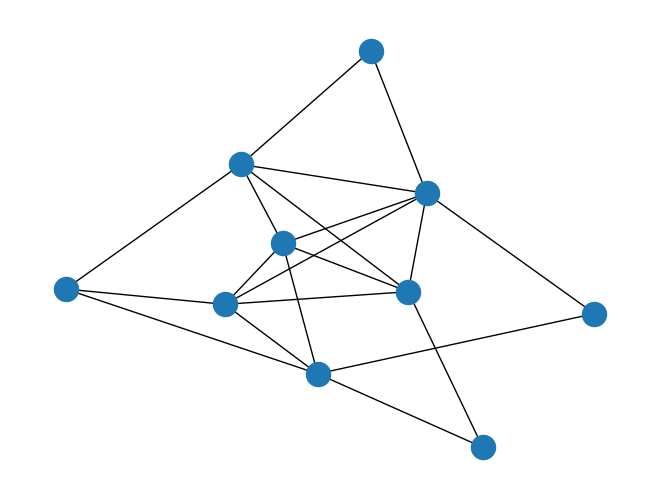

In [215]:
G = nx.to_networkx_graph(p[11])
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()


## Uji Coba dan Eksperimentasi

### Skenario 1

In [245]:
# p, p_fit, pop_flow, gp = outerga(size=50, nodes=20, edges=60, generasi=100)

In [246]:
# from numpy import savez_compressed
# savez_compressed("../datastore/experiment_data/skenario1.npz", p=p, p_fit=p_fit, pop_flow=pop_flow, global_cap=gp)

In [274]:
from numpy import load
loadd = load("../datastore/experiment_data/skenario1.npz", allow_pickle=True)
p, p_fit, pop_flow, gp = loadd['p'], loadd["p_fit"], loadd["pop_flow"], loadd["global_cap"]

In [275]:
p_fit

array([3.08934188, 4.23029165, 2.98360451, 3.55889444, 5.46684827,
       2.92654761, 2.6069911 , 2.32240276, 3.81906109, 4.25727981,
       2.55474747, 3.54465077, 2.71024017, 2.80110004, 2.69823721,
       3.40082261, 5.13646843, 2.31033859, 3.22760913, 4.15497118,
       4.26279969, 4.14254498, 3.55096345, 3.64092747, 2.8011119 ,
       3.40484466, 2.35690045, 5.25321249, 4.41452828, 3.0701212 ,
       3.01955812, 2.96346828, 3.00197776, 3.93171995, 2.18132285,
       4.1036068 , 4.16742579, 6.94095914, 4.00585993, 3.37425164,
       2.70528778, 3.20821625, 3.06275731, 3.6061112 , 3.9528797 ,
       3.8583323 , 2.67579792, 3.3394167 , 2.56002295, 3.09904454])

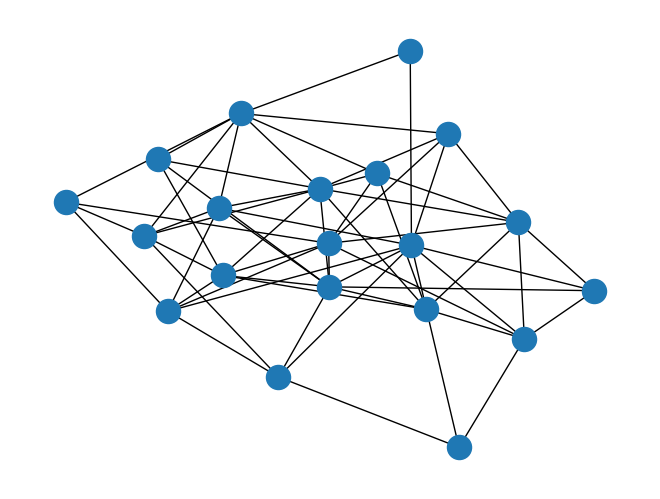

In [276]:
G = nx.to_networkx_graph(p[37])
pos = nx.spring_layout(G, seed=15)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()